# Harry Wu

## Research question/interests
### Research Question 1:
**I would like to explore the average, or most common price per night, that a traveller should expect when looking for an AirBnB rental in Tokyo city.**
### Research Question 2:
**I am also interested in seeing if there is a correlation between rental price & number of listings in a neighbourhood. Specifically, this could be done by comparing average prices from neighbourhoods that have a lot of air bnb rentals versus the ones that have barely any rentals.**


### Analysis Plan:
1. Import data set of each city and ensure that everything is readable under pandas.
1. Drop a few irrelevant columns, such as neighbourhood group(with too many NaN), to clean up the data.
1. Think about the appropriate graph(s) for presenting and analyzing our data, and apply them.
1. Come up with answers to our questions at the end of the project.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## EDA

In [2]:
df = pd.read_csv('../data/raw/tokyo_listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.717070,139.826080,Entire home/apt,11000,3,168,2022-12-07,1.22,1,120,3,M130003350
1,5080877,Decoboco( Artist's Studio the second floor),21769906,Decoboco,NaN,Koto Ku,35.681620,139.818590,Entire home/apt,6500,1,234,2020-02-27,2.43,2,0,0,Hotels and Inns Business Act | 江東区保健所 | ３０江健生環...
2,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.738440,139.769170,Private room,9341,3,230,2022-07-09,1.87,1,212,2,M130000243
3,5128293,＊新宿・大久保徒歩圏内 コンビニ徒歩1分 屋上から夜景ビュー No3 ドミトリールーム,8142772,Min & Haru,NaN,Shinjuku Ku,35.698720,139.702760,Shared room,5727,2,144,2022-12-25,1.50,11,165,10,M130002186
4,1016831,5 mins Shibuya Cat modern sunny Shimokita,5596383,Wakana,NaN,Setagaya Ku,35.658000,139.671340,Private room,17003,1,224,2022-12-25,1.89,1,67,13,M130001107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9781,785727667353193549,3mins to Ikebukuro sta./Max5/9min toShinjuku b...,219636782,Yuka,NaN,Toshima Ku,35.726207,139.715311,Entire home/apt,25429,3,0,NaN,NaN,19,177,0,Hotels and Inns Business Act | 豊島区池袋保健所 | 29豊池...
9782,785739075327298317,3mins to Ikebukuro sta./Max7/9min toShinjuku b...,219636782,Yuka,NaN,Toshima Ku,35.727220,139.715260,Entire home/apt,22857,3,0,NaN,NaN,19,177,0,Hotels and Inns Business Act | 豊島区池袋保健所 | 29豊池...
9783,785746929098287704,3mins to Ikebukuro sta./Max7/9min toShinjuku b...,219636782,Yuka,NaN,Toshima Ku,35.724670,139.717340,Entire home/apt,45429,3,0,NaN,NaN,19,171,0,Hotels and Inns Business Act | 豊島区池袋保健所 | 29豊池...
9784,785766037705515417,208東京赤羽站步行4分池袋9分新宿14分上野10分 免费存行李箱！微：hefuyan7190,154507729,福艷,NaN,Kita Ku,35.776760,139.716960,Entire home/apt,7857,2,0,NaN,NaN,30,178,0,M130032467


In [3]:
df.describe()
# looks like there are a few irrelevant columns in the dataset, will clean up in df_clean

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.786000e+03,9.786000e+03,0.0,9786.000000,9786.000000,9.786000e+03,9786.000000,9786.000000,8390.000000,9786.000000,9786.000000,9786.000000
mean,1.226844e+17,2.214446e+08,NaN,35.698058,139.737664,2.439311e+04,2.627325,32.150623,1.154415,13.837932,138.605866,7.963008
std,2.674419e+17,1.352475e+08,NaN,0.039771,0.072689,5.311154e+04,13.448947,53.032852,1.361996,16.307022,106.447619,15.272917
min,1.976770e+05,3.222340e+05,NaN,35.540630,139.157320,0.000000e+00,1.000000,0.000000,0.020000,1.000000,0.000000,0.000000
25%,3.202411e+07,9.430273e+07,NaN,35.688493,139.700832,1.000000e+04,1.000000,2.000000,0.370000,4.000000,55.000000,0.000000
50%,4.205199e+07,2.281334e+08,NaN,35.703500,139.732675,1.586400e+04,1.000000,11.000000,0.820000,8.000000,117.000000,3.000000
75%,5.169673e+07,3.258108e+08,NaN,35.719083,139.789017,2.661400e+04,2.000000,40.000000,1.470000,18.000000,213.000000,9.000000
max,7.918254e+17,4.929537e+08,NaN,35.830640,139.911580,2.146286e+06,1000.000000,1268.000000,31.320000,98.000000,365.000000,462.000000


In [4]:
df_clean = df.drop(['id','host_id','neighbourhood_group', 'license','room_type','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm','host_name'],axis=1)
df_clean
# I think I will start by plotting a heat map that shows the price and density of rentals around tokyo. 

,name,neighbourhood,latitude,longitude,price,minimum_nights
0,Oshiage Holiday Apartment,Sumida Ku,35.717070,139.826080,11000,3
1,Decoboco( Artist's Studio the second floor),Koto Ku,35.681620,139.818590,6500,1
2,Kero-kero house room 1,Kita Ku,35.738440,139.769170,9341,3
3,＊新宿・大久保徒歩圏内 コンビニ徒歩1分 屋上から夜景ビュー No3 ドミトリールーム,Shinjuku Ku,35.698720,139.702760,5727,2
4,5 mins Shibuya Cat modern sunny Shimokita,Setagaya Ku,35.658000,139.671340,17003,1
...,...,...,...,...,...,...
9781,3mins to Ikebukuro sta./Max5/9min toShinjuku b...,Toshima Ku,35.726207,139.715311,25429,3
9782,3mins to Ikebukuro sta./Max7/9min toShinjuku b...,Toshima Ku,35.727220,139.715260,22857,3
9783,3mins to Ikebukuro sta./Max7/9min toShinjuku b...,Toshima Ku,35.724670,139.717340,45429,3
9784,208東京赤羽站步行4分池袋9分新宿14分上野10分 免费存行李箱！微：hefuyan7190,Kita Ku,35.776760,139.716960,7857,2


In [5]:
df_clean['latitude'].max(),df_clean['longitude'].max()

(35.83064, 139.91158)

In [6]:
df_clean['latitude'].min(),df_clean['longitude'].min()

(35.54063, 139.15732)

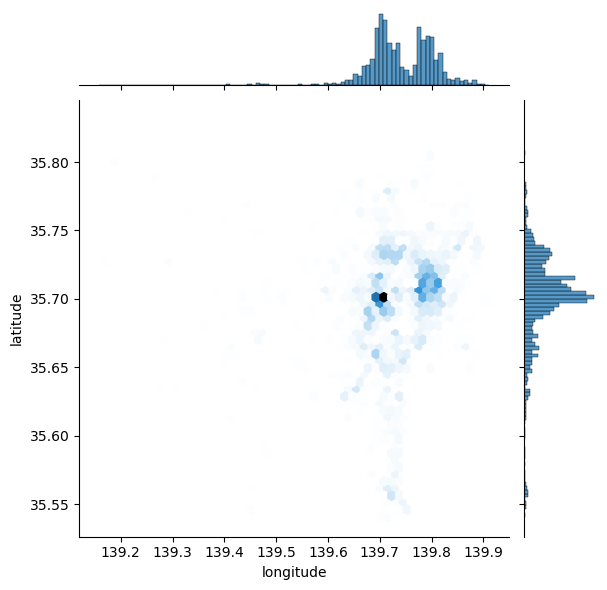

In [7]:

sns.jointplot(x=df["longitude"], y=df["latitude"], kind='hex')
plt.show()
# looks like Tokyo's airbnb rentals are very concentrated in one geographical area. This may be due to Tokyo's small urban area, large scale in measuring the latitude and longitude data, or specific tourist attractions. 
# I would like to see the listing concentration on a map. 

In [8]:
tok = plt.imread('../images/TokyoMap.png')
BBox = (df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max())
BBox

(139.15732, 139.91158, 35.54063, 35.83064)

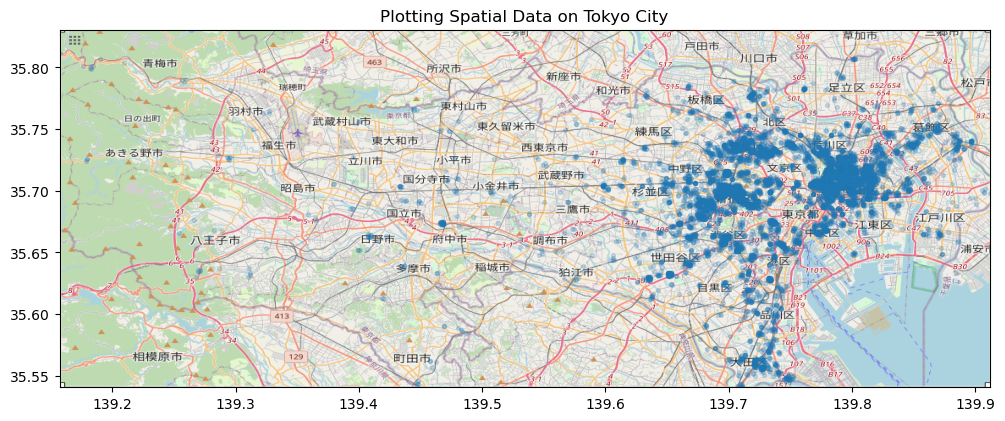

In [9]:
fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(df.longitude, df.latitude, zorder=2, alpha= 0.2, s=8)
ax.set_title('Plotting Spatial Data on Tokyo City')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(tok, zorder=0, extent = BBox, aspect= 'equal')


In [10]:
sorted(df_clean["neighbourhood"].unique().tolist())
# Since there are many unique neighbourhood, I decided to see how many listings each neighbourhood has.

['Adachi Ku',
 'Akiruno Shi',
 'Akishima Shi',
 'Arakawa Ku',
 'Bunkyo Ku',
 'Chiyoda Ku',
 'Chofu Shi',
 'Chuo Ku',
 'Edogawa Ku',
 'Fuchu Shi',
 'Fussa Shi',
 'Hachioji Shi',
 'Hamura Shi',
 'Higashimurayama Shi',
 'Hino Shi',
 'Itabashi Ku',
 'Katsushika Ku',
 'Kita Ku',
 'Kodaira Shi',
 'Koganei Shi',
 'Kokubunji Shi',
 'Komae Shi',
 'Koto Ku',
 'Kunitachi Shi',
 'Machida Shi',
 'Meguro Ku',
 'Minato Ku',
 'Mitaka Shi',
 'Musashimurayama Shi',
 'Musashino Shi',
 'Nakano Ku',
 'Nerima Ku',
 'Nishitokyo Shi',
 'Okutama Machi',
 'Ome Shi',
 'Ota Ku',
 'Setagaya Ku',
 'Shibuya Ku',
 'Shinagawa Ku',
 'Shinjuku Ku',
 'Suginami Ku',
 'Sumida Ku',
 'Tachikawa Shi',
 'Taito Ku',
 'Tama Shi',
 'Toshima Ku']

In [11]:
df_gbn=df_clean.groupby('neighbourhood').count().reset_index()
df_gbn


,neighbourhood,name,latitude,longitude,price,minimum_nights
0,Adachi Ku,94,94,94,94,94
1,Akiruno Shi,9,9,9,9,9
2,Akishima Shi,2,2,2,2,2
3,Arakawa Ku,200,200,200,200,200
4,Bunkyo Ku,160,160,160,160,160
5,Chiyoda Ku,173,173,173,173,173
6,Chofu Shi,13,13,13,13,13
7,Chuo Ku,267,267,267,267,267
8,Edogawa Ku,191,191,191,191,191
9,Fuchu Shi,33,33,33,33,33


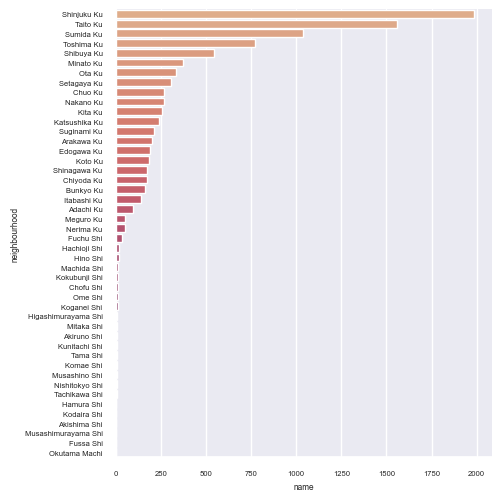

In [12]:
sns.set_theme(style="darkgrid", font_scale=0.5)
sns.catplot(data=df_gbn, y="neighbourhood", x="name", kind="bar",palette="flare",order=df["neighbourhood"].value_counts().index)

#looks like the majority of rentals are based in only a few neighbourhoods. In addition, the large number of neighbourhoods make it hard to read the graph.

In [13]:
#I am trying to pick the top 10 most concentrated neighbourhood for my analysis, assuming neighbourhoods with little to no rentals are unpopular for tourists.
n_top=df_gbn.nlargest(10,'name').reset_index(drop=True)
n_top = n_top.drop(index=n_top.index[10:]).reset_index(drop=True)
n_top


,neighbourhood,name,latitude,longitude,price,minimum_nights
0,Shinjuku Ku,1986,1986,1986,1986,1986
1,Taito Ku,1558,1558,1558,1558,1558
2,Sumida Ku,1039,1039,1039,1039,1039
3,Toshima Ku,770,770,770,770,770
4,Shibuya Ku,543,543,543,543,543
5,Minato Ku,371,371,371,371,371
6,Ota Ku,332,332,332,332,332
7,Setagaya Ku,306,306,306,306,306
8,Chuo Ku,267,267,267,267,267
9,Nakano Ku,266,266,266,266,266


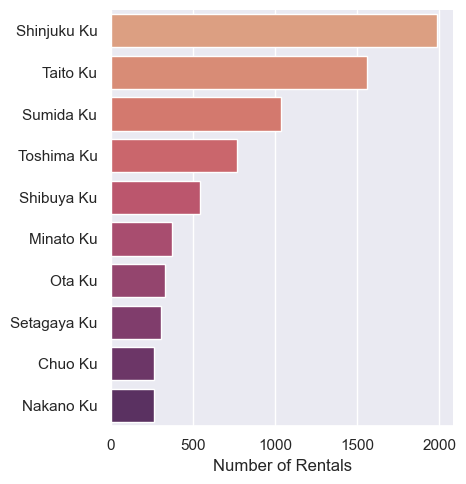

In [14]:
sns.set_theme(style="darkgrid", font_scale=1)
plot_by_tn=sns.catplot(data=n_top, y="neighbourhood", x="name", kind="bar",palette="flare",order=n_top["neighbourhood"].value_counts().index)
plot_by_tn.set_axis_labels("Number of Rentals", "")
# now this looks a lot better! I will continue exploring with a focus on the 10 top neighbourhoods.

In [15]:
#I want to make a ridge plot to identify the spread of rental pricing in each major neighbourhood, as well as identifying any outliers.
#I first start by compiling all relevant rows in the top 10 neighbourhoods into a new dataframe.
top10=n_top["neighbourhood"].unique().tolist()
df_top = df_clean.loc[lambda x : x['neighbourhood'].isin(top10)].reset_index(drop=True)
df_top

,name,neighbourhood,latitude,longitude,price,minimum_nights
0,Oshiage Holiday Apartment,Sumida Ku,35.717070,139.826080,11000,3
1,＊新宿・大久保徒歩圏内 コンビニ徒歩1分 屋上から夜景ビュー No3 ドミトリールーム,Shinjuku Ku,35.698720,139.702760,5727,2
2,5 mins Shibuya Cat modern sunny Shimokita,Setagaya Ku,35.658000,139.671340,17003,1
3,Unique stay! New&1min to the subway,Shibuya Ku,35.651110,139.721650,50710,7
4,Designer's Flat - Shibuya YOYOGI park 10mins #1,Shibuya Ku,35.663390,139.687410,16835,2
...,...,...,...,...,...,...
7433,10min from Ikebukuro station. private house,Toshima Ku,35.730002,139.731061,30000,3
7434,豊島区池袋本町から徒歩3分新築一戸建て、敷地内駐車場無料利用可能,Toshima Ku,35.740892,139.717045,32000,1
7435,3mins to Ikebukuro sta./Max5/9min toShinjuku b...,Toshima Ku,35.726207,139.715311,25429,3
7436,3mins to Ikebukuro sta./Max7/9min toShinjuku b...,Toshima Ku,35.727220,139.715260,22857,3


<AxesSubplot:xlabel='Count', ylabel='price'>

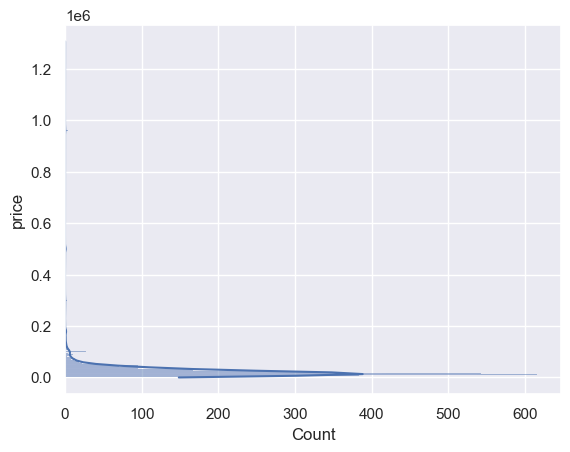

In [16]:
# Then I create a histrogram to see the pricings of all the listings, so that I can capture any outliers in pricing.
sns.histplot(data=df_top,y="price",kde=True)

**Analysis for the graph above:**
- Looks like there are a few(not many) abnormally high prices included in the dataset. This may be currency conversion issue or just an error in airbnb's data.
- I need to consider setting a price ceiling and dropping those high values out of the dataset to continue my analysis.
- I think I will conclude my EDA here and leave the more detailed cleaning work to Milestone 4.

### Next Step

I made two new columns:
- **PricePerNight**, which calculates average price for each night stay using price divided by minimum nights.
- **Price_CAD**, which converts all the valid price data from JPY to CAD, exchange rate is based on the 2022 average JPY to CAD exchange rate per [Bank of Canada](https://www.bankofcanada.ca/rates/exchange/annual-average-exchange-rates/).

I have decided to drop irrelevant row that:
- has minimum nights above 30 days, which will be irrelevant for my research question since I believe an average tourist will not stay for more than a month in their trip to Tokyo. 
- has price less than 10 CAD, since I don't think an Airbnb offers accommodation for that price.
- has price per night above 1,000 CAD, because these places are too costly and are potentially abnormal.


In [18]:
df_top=df_top.assign(PricePerNight=lambda x: x['price']/x['minimum_nights'])\
    .assign(Price_CAD=lambda x: x['PricePerNight'] * 0.00994)

df_top=df_top.drop(df_top[df_top['minimum_nights']>30].index)\
    .loc[lambda x : x['Price_CAD']>10]\
    .loc[lambda x : x['Price_CAD']<1000]\
    .reset_index(drop=True)   
     
df_top.describe()

,latitude,longitude,price,minimum_nights,PricePerNight,Price_CAD
count,7196.000000,7196.000000,7196.000000,7196.000000,7196.000000,7196.000000
mean,35.693841,139.739652,21814.379099,1.684825,16219.300511,161.219847
std,0.036712,0.048675,19044.671583,1.351250,14624.393280,145.366469
min,35.540630,139.594850,1500.000000,1.000000,1017.850000,10.117429
25%,35.688340,139.701067,11000.000000,1.000000,6315.875000,62.779798
50%,35.702225,139.727485,16957.000000,1.000000,12000.000000,119.280000
75%,35.714590,139.787414,27672.000000,2.000000,20764.125000,206.395402
max,35.744420,139.831290,699999.000000,30.000000,100000.000000,994.000000


### Analysis
The above operations dropped 242 rows from the dataset of interest, which only represents 3.25% of the entire dataset. I am happy with the result and will proceed with the cleaned dataset to answer my research questions. 

## Data Wrangling Using Imported Method
Alternatively, I will use a python program built by myself to do all my data wrangling on the initial dataframe within less steps. 

In [19]:
def load_and_process(path: str,fx_rate: float,top: int = 10,min_price=10,max_price=1000,min_nights=30):
    """
    Calculates and prints a dataset with only data of interest from a standard AirBnB rental listing by city. 

    Parameters:
    path (str): The import path of the AirBnB rental listing dataframe.
    fx_rate (float): The foreign exchange rate from the specified foreign currency to Canadian Dollars.
    top (int): Defines the top neighbourhoods of interest in term of number of listings. Default value is equal to 10.
    min_price: User-defined appropriate minimum price per night, in Canadian Dollars, for the listings in neighbourhoods of interest. Default value is equal to 10.
    max_price: User-defined appropriate maximum price per night, in Canadian Dollars, for the listings in neighbourhoods of interest. Default value is equal to 1000.
    min_nights: User-defined appropriate minimum nights stay in the given city. Default value is equal to 30.

    Returns:
    Filtered dataset based on the given arguments

    """
    
    
    # Check for valid data types for mandatory inputs 
    
    assert (type(path)==str), "Please make sure you are entering a valid file path as a string item."
    assert (type(fx_rate)==float), "Please make sure you are entering a valid foreign exchange rate (foreign currency to CAD) as a float."
    
    # Load data and drop uneccessary columns

    df1 = pd.read_csv(path).drop(['id','host_id','neighbourhood_group', 'license','room_type','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm','host_name'],axis=1)

    # Pick up the top (with a specified number, default at 10) neighbourhoods with the most rental listings
    
    df2=df1.groupby('neighbourhood').count().reset_index().nlargest(top,'name').reset_index(drop=True)
    df2=df2.drop(index=df2.index[top:])
    # Filter the cleaned dataset with the top neighbourhoods of interest
    
    top_neigh=df2["neighbourhood"].unique().tolist()
    df3 = df1.loc[lambda x : x['neighbourhood'].isin(top_neigh)]

    # Assign new columns PricePerNight and Price_CAD to help with analysis
    
    df4=df3.assign(PricePerNight=lambda x: x['price']/x['minimum_nights'])\
    .assign(Price_CAD=lambda x: x['PricePerNight'] * fx_rate)
    
    # Drop listings that requires minimum nights beyond a regular travel duration, and any Price per Night in CAD that are abnormal
    
    df5=df4.drop(df4[df4['minimum_nights']>min_nights].index)\
    .loc[lambda x : x['Price_CAD']>min_price]\
    .loc[lambda x : x['Price_CAD']<max_price]\
    .reset_index(drop=True)



    return df5


In [20]:
path='../data/raw/tokyo_listings.csv'
fx_rate=0.00994
top=10
min_price=5
max_price=500
min_nights=15

load_and_process(path,fx_rate,top,min_price,max_price,min_nights)

,name,neighbourhood,latitude,longitude,price,minimum_nights,PricePerNight,Price_CAD
0,Oshiage Holiday Apartment,Sumida Ku,35.717070,139.826080,11000,3,3666.666667,36.446667
1,＊新宿・大久保徒歩圏内 コンビニ徒歩1分 屋上から夜景ビュー No3 ドミトリールーム,Shinjuku Ku,35.698720,139.702760,5727,2,2863.500000,28.463190
2,5 mins Shibuya Cat modern sunny Shimokita,Setagaya Ku,35.658000,139.671340,17003,1,17003.000000,169.009820
3,Unique stay! New&1min to the subway,Shibuya Ku,35.651110,139.721650,50710,7,7244.285714,72.008200
4,Designer's Flat - Shibuya YOYOGI park 10mins #1,Shibuya Ku,35.663390,139.687410,16835,2,8417.500000,83.669950
...,...,...,...,...,...,...,...,...
6960,10min from Ikebukuro station. private house,Toshima Ku,35.730002,139.731061,30000,3,10000.000000,99.400000
6961,豊島区池袋本町から徒歩3分新築一戸建て、敷地内駐車場無料利用可能,Toshima Ku,35.740892,139.717045,32000,1,32000.000000,318.080000
6962,3mins to Ikebukuro sta./Max5/9min toShinjuku b...,Toshima Ku,35.726207,139.715311,25429,3,8476.333333,84.254753
6963,3mins to Ikebukuro sta./Max7/9min toShinjuku b...,Toshima Ku,35.727220,139.715260,22857,3,7619.000000,75.732860


In [30]:
cpath=os.getcwd()
os.chdir(cpath+'\\code')
from project_functions1 import load_and_process
os.chdir(cpath)
path='../data/raw/tokyo_listings.csv'
fx_rate=0.00994
top=10
min_price=5
max_price=500
min_nights=15


df = load_and_process(path,fx_rate,top,min_price,max_price,min_nights)
df

,name,neighbourhood,latitude,longitude,price,minimum_nights,PricePerNight,Price_CAD
0,Oshiage Holiday Apartment,Sumida Ku,35.717070,139.826080,11000,3,3666.666667,36.446667
1,＊新宿・大久保徒歩圏内 コンビニ徒歩1分 屋上から夜景ビュー No3 ドミトリールーム,Shinjuku Ku,35.698720,139.702760,5727,2,2863.500000,28.463190
2,5 mins Shibuya Cat modern sunny Shimokita,Setagaya Ku,35.658000,139.671340,17003,1,17003.000000,169.009820
3,Unique stay! New&1min to the subway,Shibuya Ku,35.651110,139.721650,50710,7,7244.285714,72.008200
4,Designer's Flat - Shibuya YOYOGI park 10mins #1,Shibuya Ku,35.663390,139.687410,16835,2,8417.500000,83.669950
...,...,...,...,...,...,...,...,...
6960,10min from Ikebukuro station. private house,Toshima Ku,35.730002,139.731061,30000,3,10000.000000,99.400000
6961,豊島区池袋本町から徒歩3分新築一戸建て、敷地内駐車場無料利用可能,Toshima Ku,35.740892,139.717045,32000,1,32000.000000,318.080000
6962,3mins to Ikebukuro sta./Max5/9min toShinjuku b...,Toshima Ku,35.726207,139.715311,25429,3,8476.333333,84.254753
6963,3mins to Ikebukuro sta./Max7/9min toShinjuku b...,Toshima Ku,35.727220,139.715260,22857,3,7619.000000,75.732860


## Answering Research Question 1:
Now that I have dropped the unreasonable values without significantly reducing our dataset, I think I can proceed with answering research question 1, "finding out the average, or most common price per night, that a traveller should expect when looking for an AirBnB rental in Tokyo city".

## Answer to Research Question 1:
I believe the mean of the Price_CAD column, **$158.57 CAD** (calculated in df_top.describe() above), is the answer.

## Answering Research Question 2:
To answer my question on the correlation between rental price and number of listings in a neighbourhood, I would like to start by creating a ridge plot on each neighbourhood.

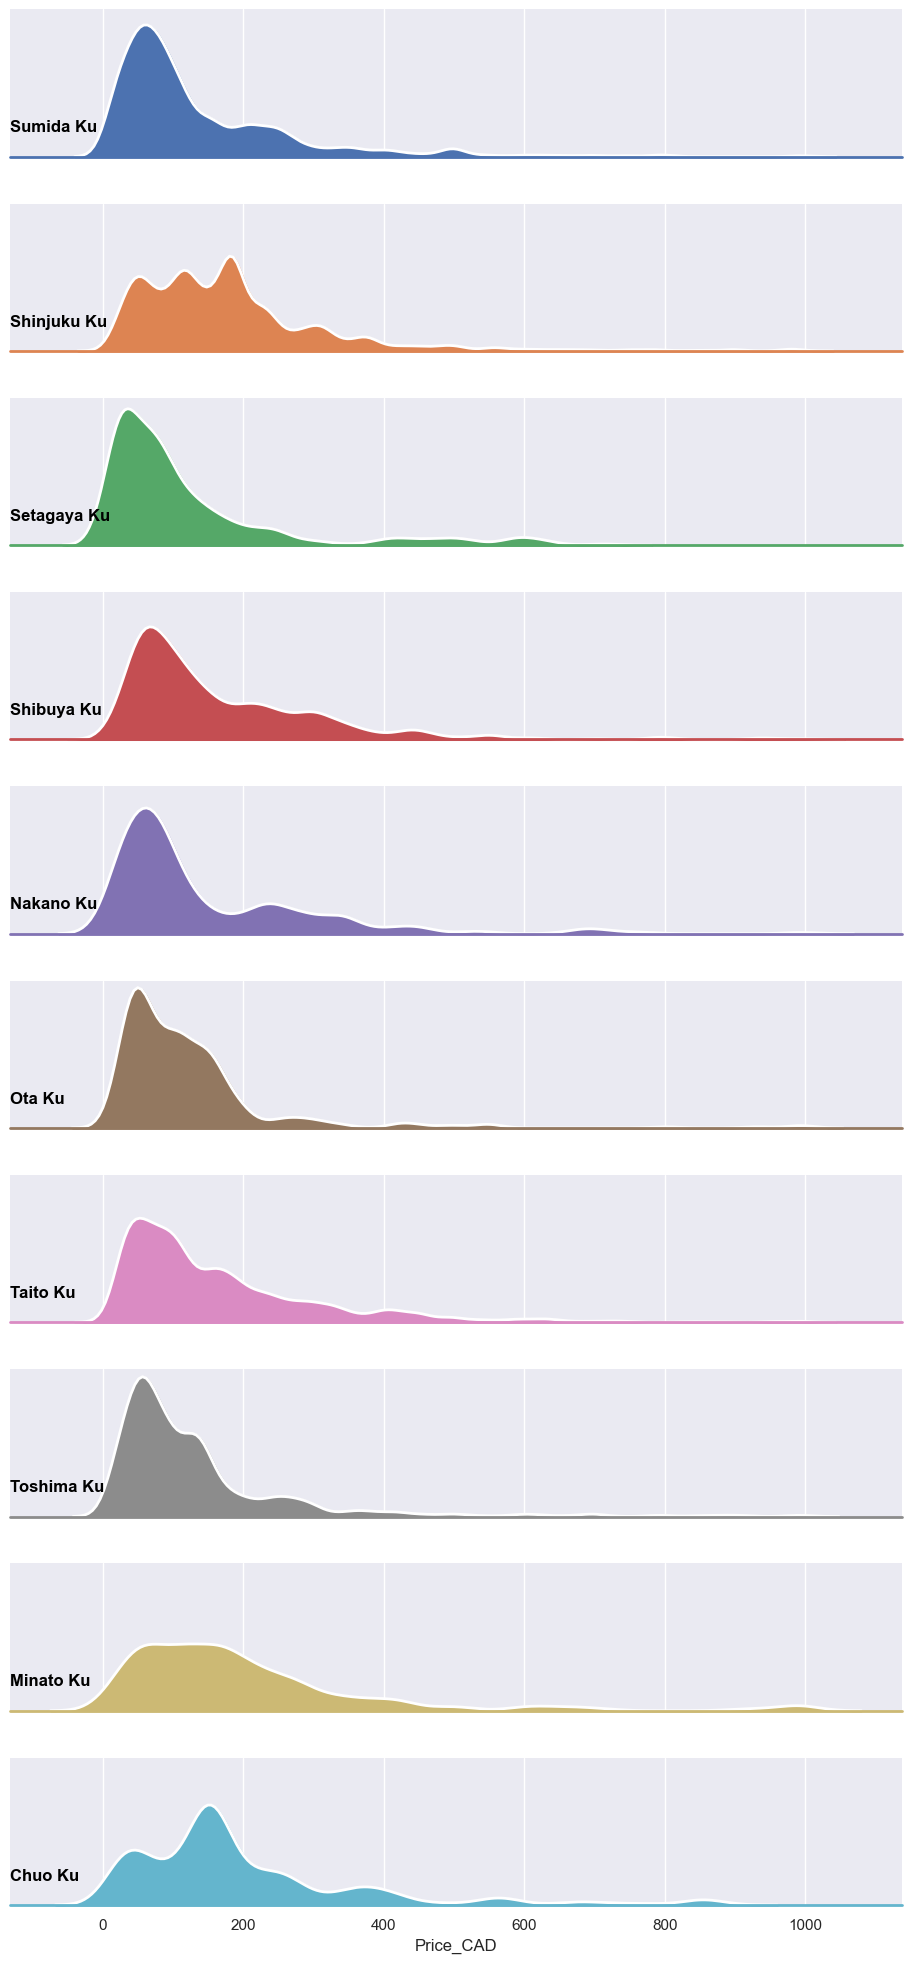

In [26]:
g = sns.FacetGrid(df_top, row="neighbourhood",hue="neighbourhood", aspect=5, height=2)

g.map(sns.kdeplot, "Price_CAD",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Price_CAD", clip_on=False, color="w", lw=2, bw_adjust=.5)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color="black",
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Price_CAD")

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

Then, I am grouping my data by averages of neighbourhood to obtain the average price per night in CAD.

In [27]:
df_avg=df_top.groupby('neighbourhood').mean(numeric_only=True).reset_index()
df_avg

,neighbourhood,latitude,longitude,price,minimum_nights,PricePerNight,Price_CAD
0,Chuo Ku,35.677202,139.778086,22629.773438,1.285156,20195.628906,200.744551
1,Minato Ku,35.658431,139.738820,26614.705202,1.797688,20592.083099,204.685306
2,Nakano Ku,35.701271,139.671617,20724.679688,2.015625,14897.804297,148.084175
3,Ota Ku,35.564381,139.725009,18772.330275,1.828746,12495.109837,124.201392
4,Setagaya Ku,35.645720,139.654588,17180.243333,1.780000,12327.451706,122.534870
5,Shibuya Ku,35.667192,139.694591,24119.193858,1.842610,16825.621173,167.246674
6,Shinjuku Ku,35.700611,139.705227,24458.955683,1.658498,18297.328544,181.875446
7,Sumida Ku,35.708481,139.810426,19763.265366,1.783415,13813.962750,137.310790
8,Taito Ku,35.712868,139.787247,20690.371863,1.472259,16571.633708,164.722039
9,Toshima Ku,35.732671,139.716566,19529.702592,1.810368,13249.632151,131.701344


Recall that I have already created a dataset n_top above to determine the top 10 neighbourhood with the most rental listings. Therefore, I am recreating the catplot down here to compare the number of listings and average CAD price per night for each neighbourhood to capture any correlations.  

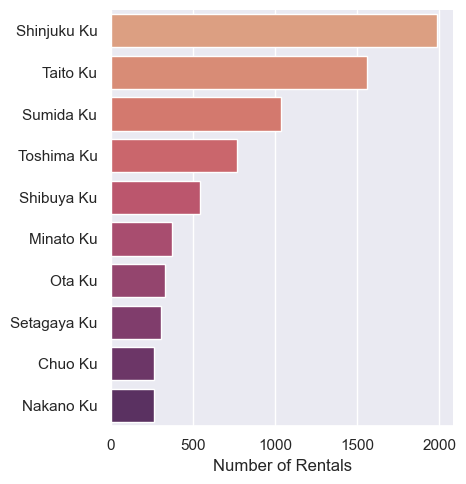

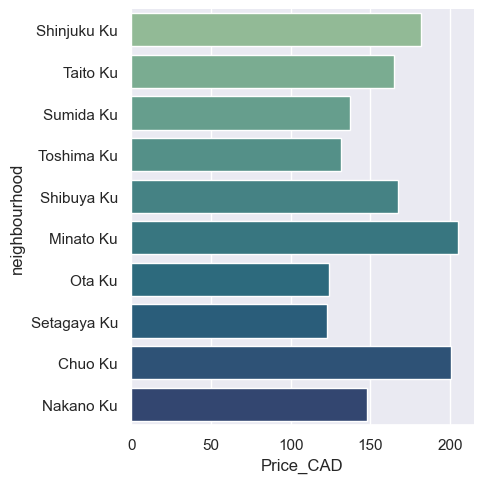

In [28]:
plot_by_tn=sns.catplot(data=n_top, y="neighbourhood", x="name", kind="bar",palette="flare",order=n_top["neighbourhood"].value_counts().index)
plot_by_tn.set_axis_labels("Number of Rentals", "")
plot_by_tn.set_titles("Neighbourhood by Number of Listings")
sns.catplot(data=df_avg, y="neighbourhood", x="Price_CAD", kind="bar",palette="crest",order=n_top["neighbourhood"].value_counts().index)

## Answer to Research Question 2:
I believe there are **no correlations** between the number of listings in a neighbourhood and the average rental price per night. This is an interesting finding since:
- I originally thought more listings in a certain neighbourhood (for example, Shinjuku Ku) will drive down rental price in that area. 
- In reality, neighbourhoods with under 500 listings, such as Minato Ku and Chuo Ku, ended up with higher average pricing. I think this could be due to the smaller sample size, which allows bigger impact on the average pricing from higher individual listing (we can see that there are quite a few 600 to 1,000 dollars per night listings from the ridge plot, on Minato Ku and Chuo Ku's plots). 